# Problem Statement

XYZ.CO aims to analyze sales data from 2014 to 2018 to uncover key revenue and profit drivers across products, sales channels, and regions. 

### The Objective is to:

Identify seasonal trends, outliers, and performance variances.

Align actual sales and profit performance against budget targets.

Use insights to optimize:

Pricing strategies

Promotional campaigns

Market expansion plans

The ultimate goal is to enable sustainable growth and reduce concenrtration by making data-driven decisions across the organizationand.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sheets = pd.read_excel(r"C:\Users\honnu\Downloads\Regional Sales Dataset.xlsx" , sheet_name = None )

In [3]:
df_sales = sheets ["Sales Orders"]
df_Customer =sheets ["Customers"]
df_products =sheets ["Products"]
df_regions = sheets ["Regions"]
df_states=sheets ["State Regions"]
df_budget =sheets ["2017 Budgets"]

In [9]:
print("df_sales shape : " , df_sales.shape)
print("df_Customer shape : " , df_Customer.shape)
print("df_products shape : ", df_products.shape)
print("df_regions shape : ",df_regions.shape)
print("df_states shape : ", df_states.shape)
print("df_budget shape : " , df_budget.shape)

df_sales shape :  (64104, 12)
df_Customer shape :  (175, 2)
df_products shape :  (30, 2)
df_regions shape :  (994, 15)
df_states shape :  (49, 3)
df_budget shape :  (30, 6)


In [10]:
df_sales.head(5)
df_Customer.head(5)
df_products.head(5)
df_regions.head(5)
df_states.head(5)
df_budget.head(5)

,Product Name,2017 Budgets,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Product 1,3016489.209,NaN,NaN,NaN,NaN
1,Product 2,3050087.565,NaN,NaN,NaN,NaN
2,Product 3,2642352.432,NaN,NaN,NaN,NaN
3,Product 4,2885560.824,NaN,NaN,NaN,NaN
4,Product 5,3925424.542,NaN,NaN,NaN,NaN


In [7]:
df_Customer.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [8]:
df_products

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5
5,6,Product 6
6,7,Product 7
7,8,Product 8
8,9,Product 9
9,10,Product 10


In [22]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [76]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [77]:
df_states.head(5)

,Column1,Column2,Column3
0,,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [11]:
new_header = df_states.iloc[0]

In [12]:
df_states.columns = new_header

In [13]:
df_states = df_states[1:].reset_index(drop = True)

In [14]:
df_states.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [15]:
df_states = sheets['State Regions']

In [16]:
new_header = df_states.iloc[0]

In [17]:
df_states.columns = new_header

### Reseting the 1 row as index

In [18]:
df_states = df_states[1:].reset_index( drop = True)

In [19]:
df_states.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [20]:
df_states.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [21]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

### Data Cleaning And Wrangling

In [22]:
merged = df_sales.merge(
    df_Customer,
    how="left",
    left_on="Customer Name Index",
    right_on="Customer Index"
)


In [36]:
merged.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [23]:
df_Customer.columns

Index(['Customer Index', 'Customer Names'], dtype='object')

### Merging the Sales Orders and Customers

In [24]:
df = df_sales.merge(
    df_Customer,
    how="left",
    left_on="Customer Name Index",
    right_on="Customer Index"
)


In [39]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


### Merge with Products

In [25]:
df = df.merge(
    df_products,
    how="left",
    left_on="Product Description Index",
    right_on="Index"
)


In [41]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


### Merge with Regions

In [26]:
df = df.merge(
    df_regions,
    how="left",
    left_on="Delivery Region Index",
    right_on="id"
)


In [43]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


### Merge with State Regions

In [27]:
df = df.merge( df_states[["State Code" ,"Region"]],
               how = "left",
               left_on ="state_code",
               right_on ="State Code"
             )

In [45]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [28]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'State Code', 'Region'],
      dtype='object')

In [30]:
df.to_csv('file.csv')

### Merge with 2017 Budget

In [31]:
df = df.merge( df_budget,
               how = "left",
              on ="Product Name"
             )

In [32]:
### Customer Index
### Index
### id
### State Code

# Clean up  reduent Columns
colum_drop =['Customer Index','Index','id','State Code']



In [33]:
df = df.drop(columns = colum_drop ,errors ='ignore')

In [51]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,median_income,land_area,water_area,time_zone,Region,2017 Budgets,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,36466,268318796,13908113,America/New York,South,964940.231,NaN,NaN,NaN,NaN
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120,NaN,NaN,NaN,NaN
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,124759,62489257,386195,America/Los Angeles,West,5685138.270,NaN,NaN,NaN,NaN
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555,NaN,NaN,NaN,NaN
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,63158,70972793,720300,America/New York,Northeast,1085037.329,NaN,NaN,NaN,NaN


In [110]:
# Conver the all columns from Data Frame to Lower Case

In [34]:
df.columns = df.columns.str.lower()

In [53]:
df

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,median_income,land_area,water_area,time_zone,region,2017 budgets,unnamed: 2,unnamed: 3,unnamed: 4,unnamed: 5
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,36466,268318796,13908113,America/New York,South,964940.231,NaN,NaN,NaN,NaN
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120,NaN,NaN,NaN,NaN
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,124759,62489257,386195,America/Los Angeles,West,5685138.270,NaN,NaN,NaN,NaN
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555,NaN,NaN,NaN,NaN
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,63158,70972793,720300,America/New York,Northeast,1085037.329,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,69878,26311722,253129,America/New York,Northeast,5685138.270,NaN,NaN,NaN,NaN
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,71573,35271964,370235,America/Chicago,Midwest,959899.218,NaN,NaN,NaN,NaN
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,42786,22943340,594611,America/New York,South,3720639.645,NaN,NaN,NaN,NaN
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,48662,76228647,162756,America/New York,Northeast,2067108.120,NaN,NaN,NaN,NaN


In [35]:
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets', 'unnamed: 2', 'unnamed: 3', 'unnamed: 4',
       'unnamed: 5'], dtype=object)

In [36]:
# Keep the Important Columns and Delete Columns That we dont need


cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

In [37]:
df = df[cols_to_keep]

In [38]:
df

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Bucks County,Pennsylvania,Northeast,40.15511,-74.82877,5685138.270
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Cook County,Illinois,Midwest,42.11030,-88.03424,959899.218
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Broward County,Florida,South,26.24453,-80.20644,3720639.645
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,Erie County,New York,Northeast,42.91002,-78.74182,2067108.120


In [39]:
# Adding the under scor in balnk space between column name

df.columns = df.columns.str.replace(' ', '_')


In [40]:
df

,ordernumber,orderdate,customer_names,channel,product_name,order_quantity,unit_price,line_total,total_unit_cost,state_code,county,state,region,latitude,longitude,2017_budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Bucks County,Pennsylvania,Northeast,40.15511,-74.82877,5685138.270
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Cook County,Illinois,Midwest,42.11030,-88.03424,959899.218
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Broward County,Florida,South,26.24453,-80.20644,3720639.645
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,Erie County,New York,Northeast,42.91002,-78.74182,2067108.120


In [41]:
df.columns

Index(['ordernumber', 'orderdate', 'customer_names', 'channel', 'product_name',
       'order_quantity', 'unit_price', 'line_total', 'total_unit_cost',
       'state_code', 'county', 'state', 'region', 'latitude', 'longitude',
       '2017_budgets'],
      dtype='object')

In [71]:
df = df.rename(columns = { 'ordernumber' : 'order_number', 'orderdate':'order_date','line_total' : 'revenue',
                         'state code':'state','latitude':'lat','longitude':'lon', '2017_budgets':'budget'} )

In [73]:
df

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Bucks County,Pennsylvania,Northeast,40.15511,-74.82877,NaN
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Cook County,Illinois,Midwest,42.11030,-88.03424,NaN
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Broward County,Florida,South,26.24453,-80.20644,NaN
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,Erie County,New York,Northeast,42.91002,-78.74182,NaN


In [74]:
df.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [75]:


df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA


In [76]:
df[['order_date','product_name','revenue','budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [77]:
df.to_csv('Final.csv')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   customer_names  64104 non-null  object        
 3   channel         64104 non-null  object        
 4   product_name    64104 non-null  object        
 5   order_quantity  64104 non-null  int64         
 6   unit_price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   cost            64104 non-null  float64       
 9   state_code      64104 non-null  object        
 10  county          64104 non-null  object        
 11  state           64104 non-null  object        
 12  region          64104 non-null  object        
 13  lat             64104 non-null  float64       
 14  lon             64104 non-null  float64       
 15  bu

### Filter The Data Set To Only Include The Record From 2017

In [79]:
df_2017 = df[df['order_date'].dt.year == 2017]

In [80]:
df.isnull().sum()

order_number          0
order_date            0
customer_names        0
channel               0
product_name          0
order_quantity        0
unit_price            0
revenue               0
cost                  0
state_code            0
county                0
state                 0
region                0
lat                   0
lon                   0
budget            48841
dtype: int64

In [57]:
df_2017.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state,region,lat,lon,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


### Feature Engineering

In [86]:
total_revenue = df_2017['revenue'].sum()

In [82]:
print("Total Revenue :  ", total_revenue)

Total Revenue :   293823836.8000001


In [84]:
df['Total_Cost'] = df['order_quantity']* df['cost']

In [85]:
df

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state,region,lat,lon,budget,Total_Cost
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Bucks County,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Cook County,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Broward County,Florida,South,26.24453,-80.20644,NaN,29133.610
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,Erie County,New York,Northeast,42.91002,-78.74182,NaN,20511.246


In [87]:
df.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state,region,lat,lon,budget,Total_Cost
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160


In [88]:
df['Profit'] = df['revenue'] - df['Total_Cost']

In [89]:
df

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state,region,lat,lon,budget,Total_Cost,Profit
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Bucks County,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Cook County,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Broward County,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,Erie County,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654


In [91]:
df['Profit_Margin_perecentage'] = df['Profit'] / df['revenue'] * 100 

In [93]:
df.head()

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state,region,lat,lon,budget,Total_Cost,Profit,Profit_Margin_perecentage
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


### *** Exploratory Data Analysis

# 1. Monthly Sales Trend Over Time

Goal: Track revenue trends over time to detect seasonality or sales spikes

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers to highlight monthly revenue points clearly

In [5]:
df['order_month'] = df['order_date'].dt.to_period('M')

NameError: name 'df' is not defined

In [4]:
monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))

# ✅ Call plot() function instead of assigning
monthly_sales.plot(marker='o', color='navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')

plt.gca().yaxis.set_major_formatter(formatter)  # ✅ apply formatter

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

###  Additional Methods

In [166]:
monthly_sales = df.groupby("order_month").agg({
    "revenue": "sum",
    "Total_Cost": "sum",
    "Profit": "sum",
    "Profit_Margin_perecentage": "mean"  # margin as average
}).reset_index()

# Convert Period to Timestamp for plotting
monthly_sales["order_month"] = monthly_sales["order_month"].dt.to_timestamp()

In [ ]:
df["order_date"] = pd.to_datetime(df["order_date"])

# Ensure order_date is datetime
df["order_date"] = pd.to_datetime(df["order_date"])

# Drop records from Jan 2018 and Feb 2018
df_new = df[~((df["order_date"].dt.year == 2018) & (df["order_date"].dt.month.isin([1, 2])))]

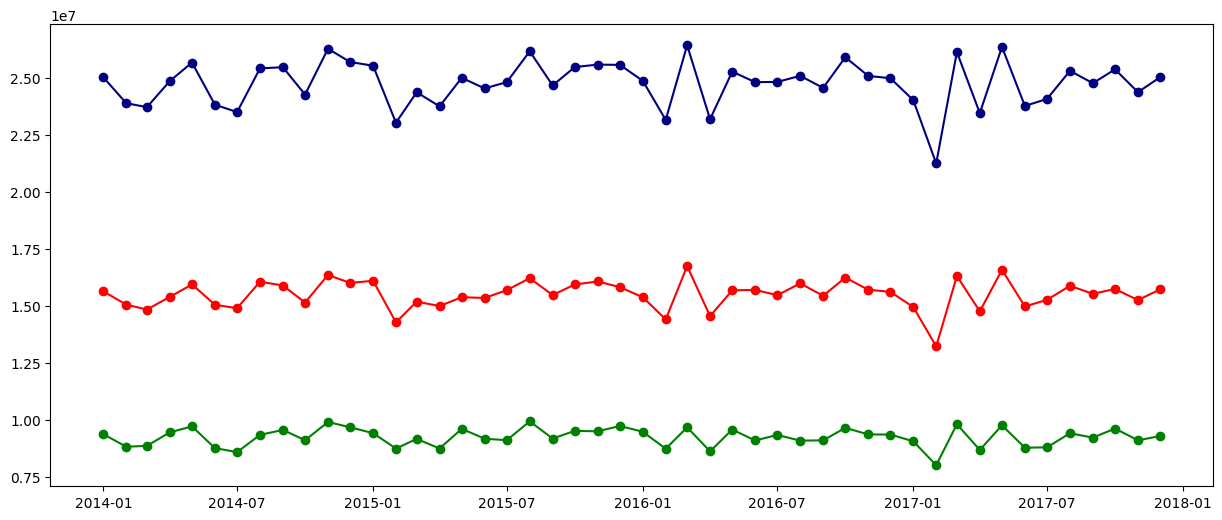

In [167]:
plt.figure(figsize=(15,6))
plt.plot(monthly_sales["order_month"], monthly_sales["revenue"], marker="o", label="Revenue", color="navy")
plt.plot(monthly_sales["order_month"], monthly_sales["Total_Cost"], marker="o", label="Total Cost", color="red")
plt.plot(monthly_sales["order_month"], monthly_sales["Profit"], marker="o", label="Profit", color="green")


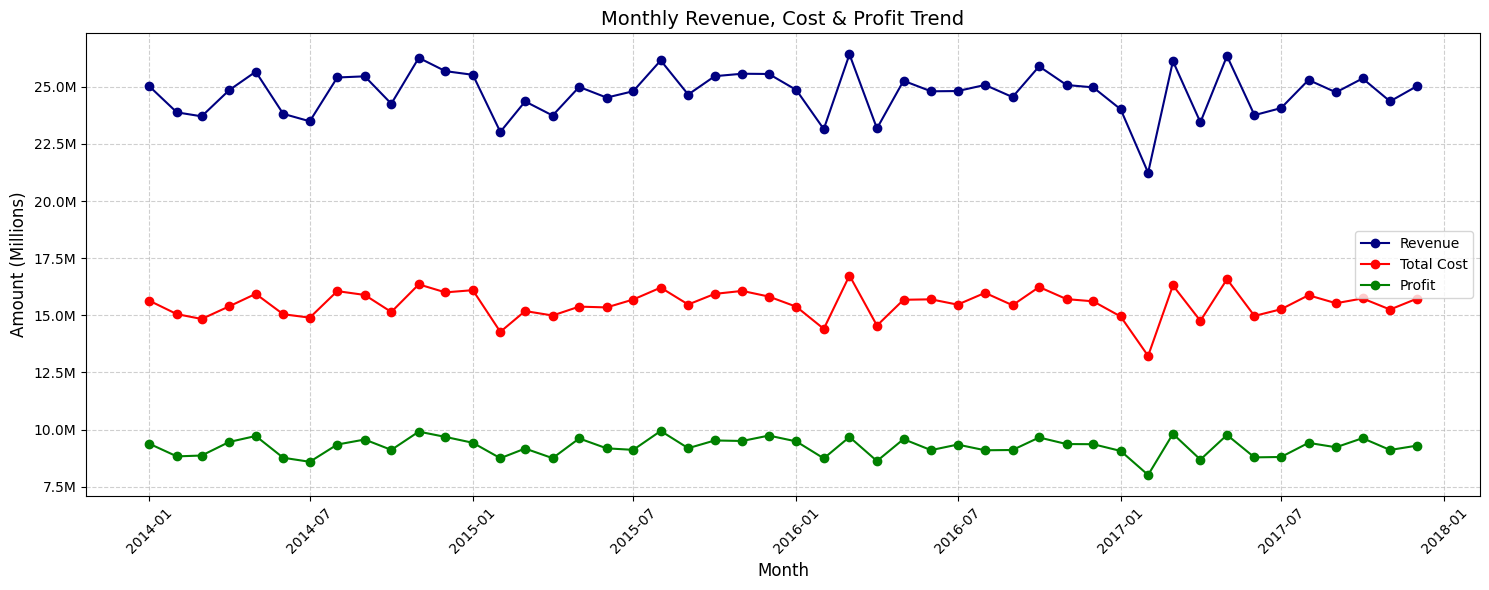

In [168]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Line chart for Revenue, Cost, Profit
plt.figure(figsize=(15,6))

plt.plot(monthly_sales["order_month"], monthly_sales["revenue"], 
         marker="o", label="Revenue", color="navy")
plt.plot(monthly_sales["order_month"], monthly_sales["Total_Cost"], 
         marker="o", label="Total Cost", color="red")
plt.plot(monthly_sales["order_month"], monthly_sales["Profit"], 
         marker="o", label="Profit", color="green")

# Format y-axis in Millions
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add labels and title
plt.title("Monthly Revenue, Cost & Profit Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Amount (Millions)", fontsize=12)

# Rotate x-axis for readability
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


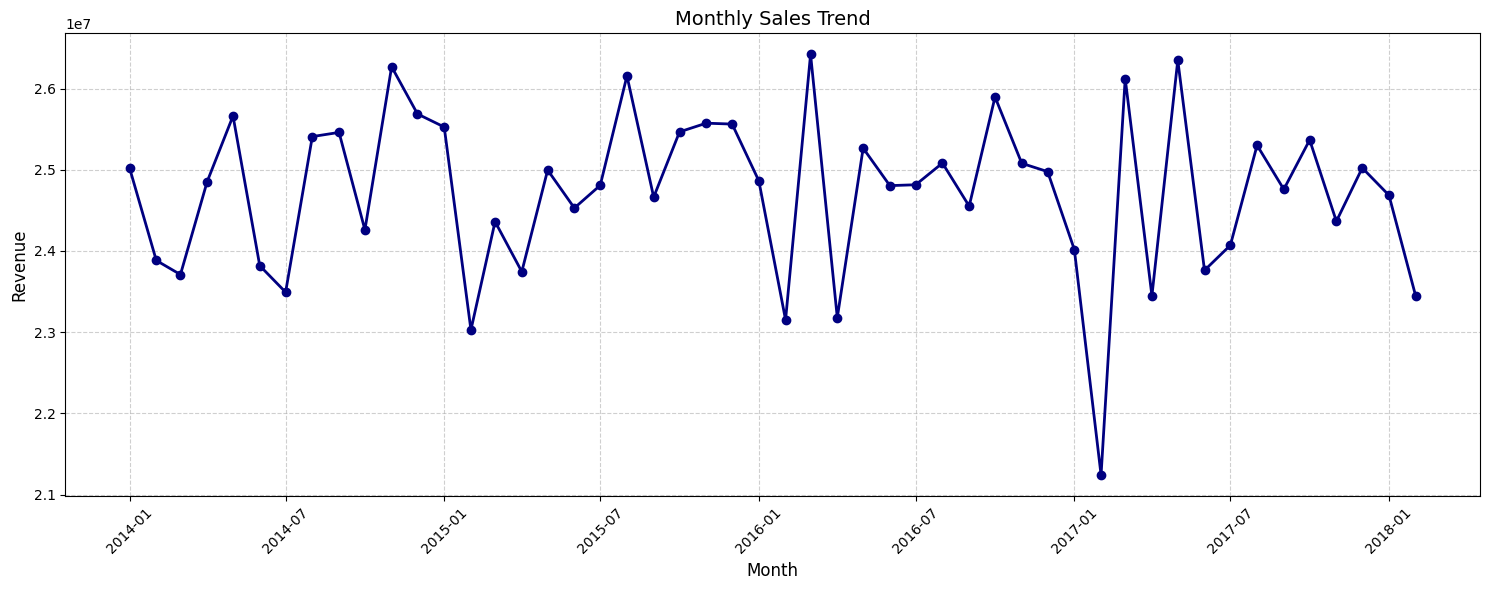

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(monthly_sales["order_month"], monthly_sales["revenue"], 
         marker="o", color="navy", linewidth=2)

plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [136]:
df

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,...,region,lat,lon,budget,Total_Cost,Profit,Profit_Margin_perecentage,order_month,Order_Month_Num,Order_Month_Name
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,2014-01,1,January
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,2014-01,1,January
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,2014-01,1,January
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,2014-01,1,January
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,2014-01,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,2018-02,2,February
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,2018-02,2,February
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,2018-02,2,February
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,2018-02,2,February


# 2. Monthly Sales Trend (All Years Combined)

In [ ]:
Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers, months ordered January to December based on month number

In [ ]:
# Ensure order_date is datetime
df["order_date"] = pd.to_datetime(df["order_date"])

# Drop records from Jan 2018 and Feb 2018
df = df[~((df["order_date"].dt.year == 2018) & (df["order_date"].dt.month.isin([1, 2])))]


In [172]:
df['Order_Month_Name'] =df['order_date'].dt.month_name()

df['Order_Month_Num'] =df['order_date'].dt.month

monthly_sales = df.groupby(['Order_Month_Name','Order_Month_Num']).agg({
    "revenue": "sum",
    "Total_Cost": "sum",
    "Profit": "sum",
    "Profit_Margin_perecentage": "mean"  # margin as average
}).reset_index()
    

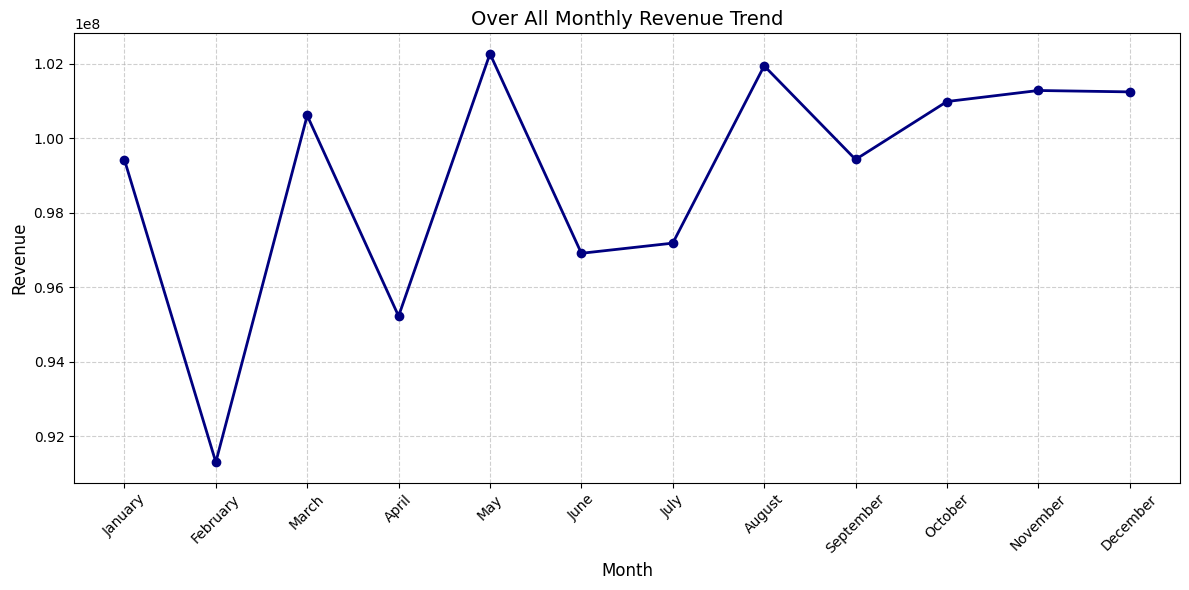

In [173]:
import matplotlib.pyplot as plt

# Sort so months are in calendar order
monthly_sales = monthly_sales.sort_values("Order_Month_Num")

# Plot Revenue
plt.figure(figsize=(12,6))
plt.plot(monthly_sales["Order_Month_Name"], 
         monthly_sales["revenue"], 
         marker="o", color="navy", linewidth=2)

plt.title("Over All Monthly Revenue Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


INSIGHTS ---
Across all years, January begins strong with roughly 
95 M).

Sales rebound in May and August (≈
99–101 M from September to December.

This pattern reveals a strong post–New Year surge, a spring dip, and a mid–summer bump each calendar year.

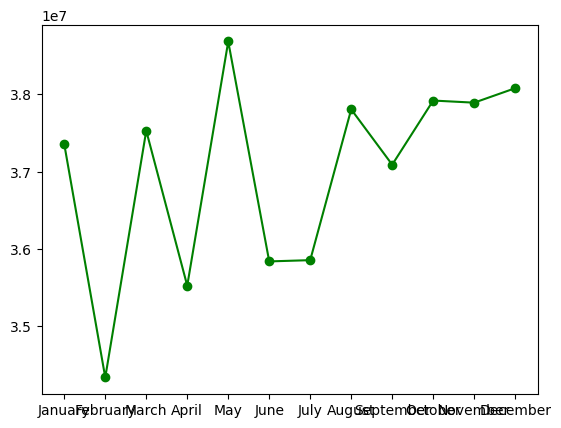

In [158]:
plt.plot(monthly_sales["Order_Month_Name"], monthly_sales["Profit"], marker="o", color="green")



In [159]:
df.to_csv('Fina.csv')

# Top 10 Products by Revenue

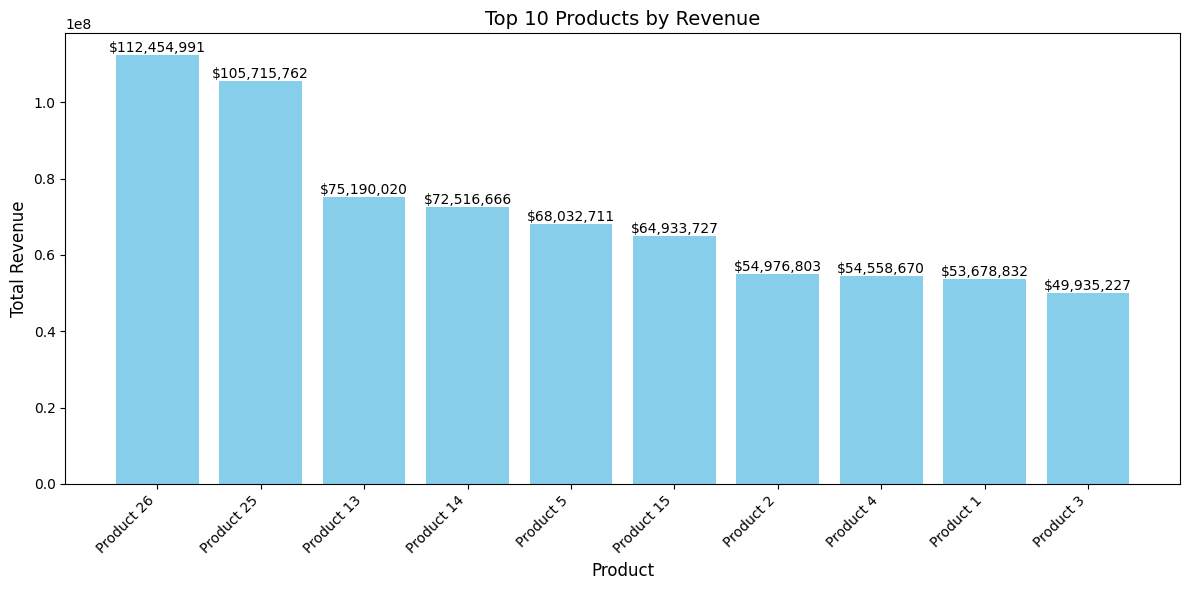

In [176]:


# Top 10 products by revenue
top_products = (
    df.groupby("product_name")["revenue"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

# Bar chart
plt.figure(figsize=(12,6))
bars = plt.bar(top_products.index, top_products.values, color="skyblue")

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f'${height:,.0f}',   # formatted with commas
             ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Products by Revenue", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



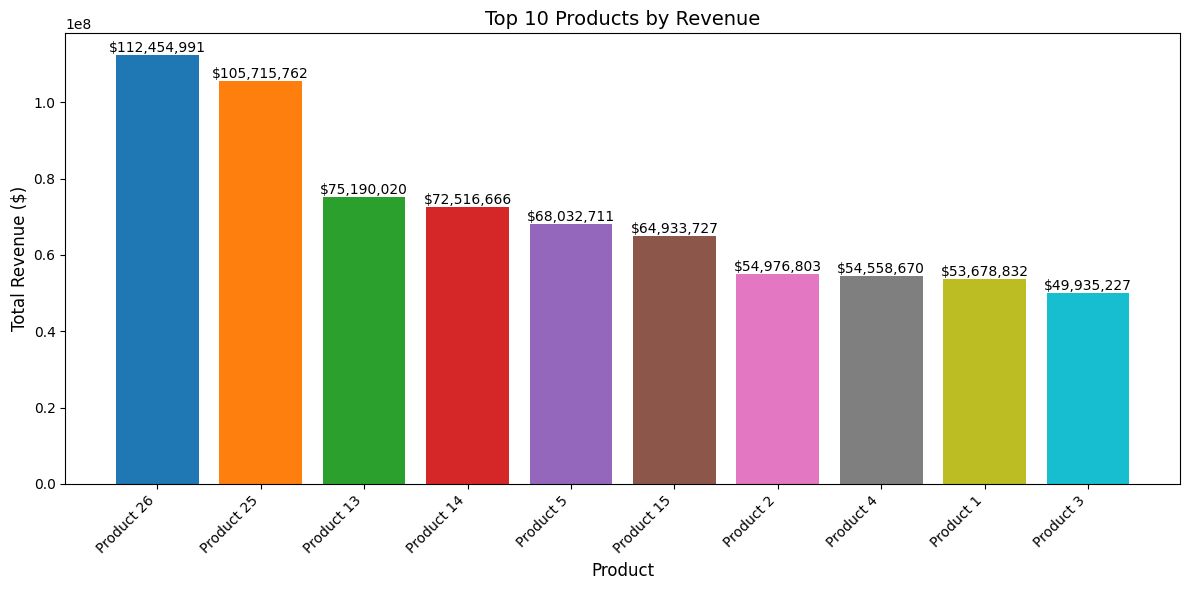

In [177]:
import matplotlib.pyplot as plt
import numpy as np

# Top 10 products by revenue
top_products = (
    df.groupby("product_name")["revenue"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

# Pick 10 distinct colors from matplotlib colormap
colors = plt.cm.tab10(np.arange(len(top_products)))

# Bar chart
plt.figure(figsize=(12,6))
bars = plt.bar(top_products.index, top_products.values, color=colors)

# Add labels on top of each bar with dollar sign
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f'${height:,.0f}',   # adds $ and thousands separator
             ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Products by Revenue", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Insights

1. Top Performers

Product 26 is the highest revenue-generating product, with approximately $112.5 million.

Product 25 follows closely with $105.7 million.

These two products significantly outperform the rest of the top 10—indicating they are possibly flagship or high-demand items.

2. Revenue Drop After Top 2

There is a noticeable revenue gap between the 2nd and 3rd products:

Product 25 → Product 13: drops from $105.7M → $75.2M.

That’s a ~29% drop, which might suggest:

Fewer sales.

Lower pricing.

Different market demand.

3. Mid-tier Products

Products ranked 3rd to 7th (Product 13 to Product 15) fall within the $64M–$75M range.

These are likely strong performers, but their revenue is not as dominant.

4. Lower Tier (Still Top 10)

The last 3 products (Product 2, Product 4, Product 1) bring in $49.9M to $54.9M.

Though they are top 10, their revenue is less than half of the top product.

5. Revenue Difference Between #1 and #10

Product 26 (Top): $112.5M

Product 3 (10th): $49.9M

That’s a ~55% drop, highlighting how revenue is concentrated in a few products.



# Bottom 10 Pruducts by Revenue

In [ ]:
Goal: Compare average loss across products to identify low-margin items

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted ascending to show Bottom  products with average profit margin values

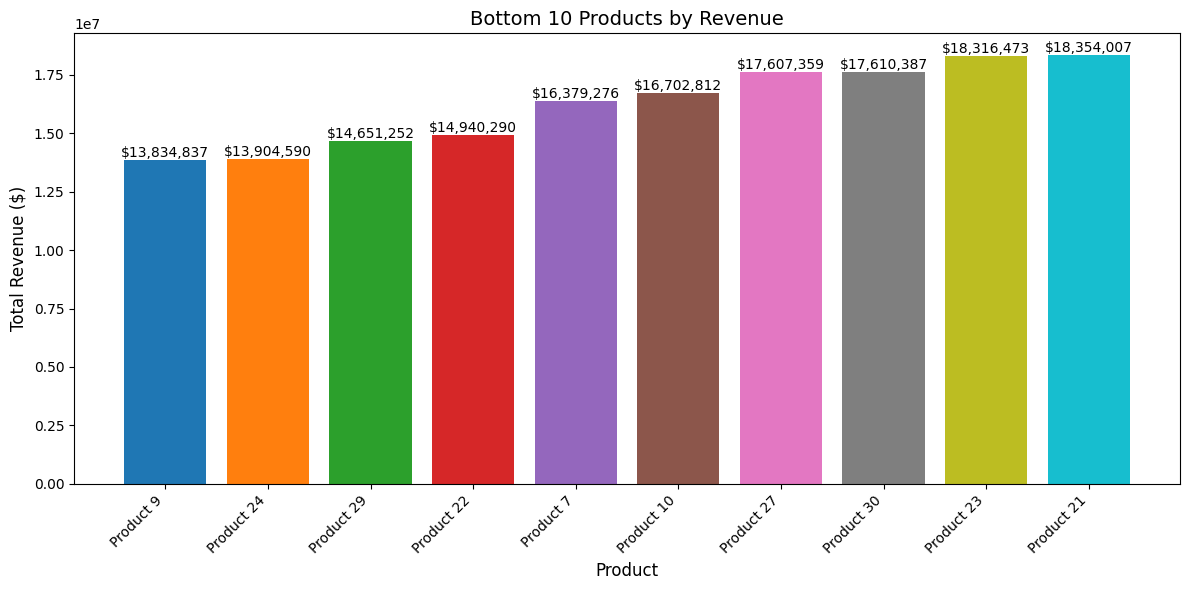

In [182]:
import matplotlib.pyplot as plt
import numpy as np

# Bottom 10 products by revenue
bottom_products = (
    df.groupby("product_name")["revenue"]
      .sum()
      .sort_values(ascending=True)   # ascending = lowest first
      .head(10)
)

# Pick distinct colors (same palette, adjusted for count)
colors = plt.cm.tab10(np.arange(len(bottom_products)))

# Bar chart
plt.figure(figsize=(12,6))
bars = plt.bar(bottom_products.index, bottom_products.values, color=colors)

# Add labels on top of each bar with dollar sign
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f'${height:,.0f}',   # adds $ and thousands separator
             ha='center', va='bottom', fontsize=10)

plt.title("Bottom 10 Products by Revenue", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


📊 Insights from the Chart
1. Tighter Revenue Distribution Compared to Previous Top 10

Revenue among these 10 products is much closer together:

Lowest (Product 9): ~$13.8M

Highest (Product 21): ~$18.35M

The difference is only about $4.5M, or roughly 33% from lowest to highest, indicating a relatively even performance.

2. High Performing Mid-Tier Products

These products are not at the very top of your overall product list but still generate substantial revenue.

This could indicate a stable mid-tier portfolio, contributing consistently to the business.

3. Potential to Boost Revenue

Since these products are already performing well and aren't too far behind the top performers:

A small increase in conversion, cross-selling, or bundling strategy could push them into the top tier.

4. Diversified Revenue Base

These 10 products show that your revenue isn't overly concentrated in just a few products.

This is a healthy sign of product portfolio diversification.

5. Products to Watch

Product 9 and Product 24 are at the lower end of this top 10.

Check if their margins are strong—if not, they may not be worth continued focus despite solid revenue.

Product 21 and Product 23 are strong performers just shy of your very top revenue products.

Consider spotlighting these in campaigns or promotions

# Sales by Channel Pi Chart and Bar chart

In [ ]:
Goal: Show distribution of total sales across channels to identify dominant sales routes

Chart: Pie chart and Bar Chart

EDA Type: Univariate

Structure: Pie segments with percentage labels, colors for clarity, start angle adjusted and Bar 

In [190]:
channel_sales = ( df.groupby('channel')["revenue"]
      .sum()
      .sort_values(ascending=True) )
plot.figure()

In [189]:
channel_sales

channel
Export         173373253.5
Distributor    372247598.1
Wholesale      642218094.9
Name: revenue, dtype: float64

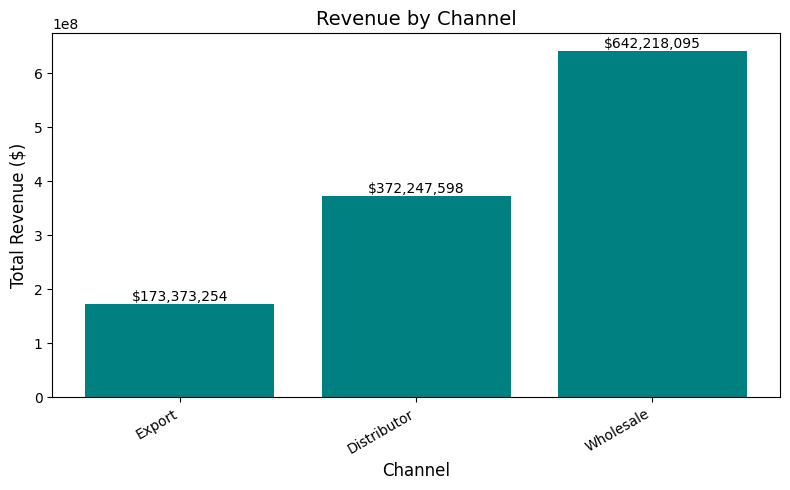

In [194]:
import matplotlib.pyplot as plt

# Revenue by channel
channel_sales = (
    df.groupby("channel")["revenue"]
      .sum()
      .sort_values(ascending=True)
)

# Bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(channel_sales.index, channel_sales.values, color="teal")

# Add labels on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'${height:,.0f}',
             ha='center', va='bottom', fontsize=10)

plt.title("Revenue by Channel", fontsize=14)
plt.xlabel("Channel", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


📊 Revenue by Channel – Insights
Channel	Revenue
Export	$173,373,254
Distributor	$372,247,598
Wholesale	$642,218,095


✅ 1. Wholesale is the Dominant Channel

Wholesale brings in the highest revenue at $642M, accounting for:

~59% of total revenue (based on visible data).

Indicates a strong B2B presence or bulk sales operation.

Consider this a strategic pillar—keep focus on service, reliability, and scaling.

📉 2. Export is the Lowest Performing Channel

Only $173M, roughly 16% of total revenue.

While still significant, it lags far behind the other channels.

Possible causes to investigate:

High shipping/logistics costs?

Limited product availability?

Regulatory or international barriers?

🔁 3. Distributor is Mid-Level but Promising

Generates $372M, about 34% of total revenue.

This is a solid performer, but there's room to grow.

With the right strategy (incentives, regional targeting, etc.), it could close the gap with Wholesale.

### Pi-Chart

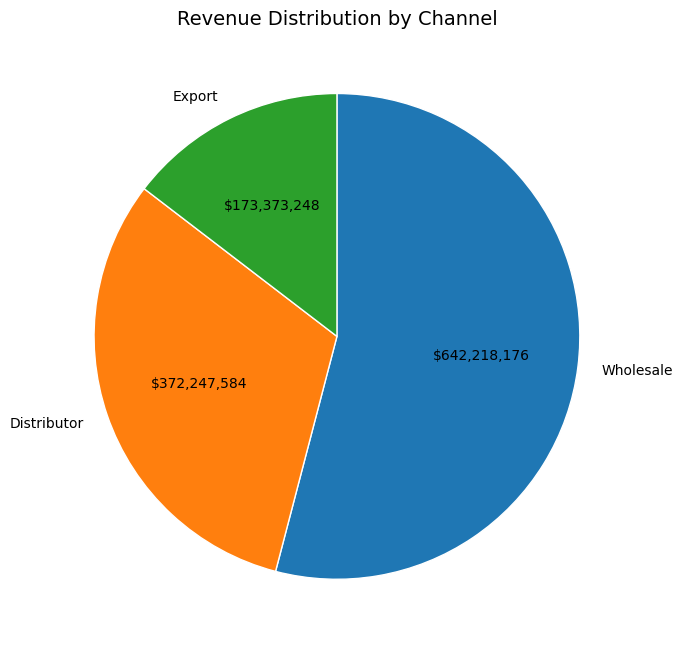

In [195]:
import matplotlib.pyplot as plt

# Revenue by channel
channel_sales = (
    df.groupby("channel")["revenue"]
      .sum()
      .sort_values(ascending=False)  # biggest first
)

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(
    channel_sales.values,
    labels=channel_sales.index,
    autopct=lambda p: f'${p*sum(channel_sales)/100:,.0f}',  # show $ value
    startangle=90,
    counterclock=False,
    wedgeprops={"edgecolor": "white"}
)

plt.title("Revenue Distribution by Channel", fontsize=14)
plt.tight_layout()
plt.show()


📊 Insights: Revenue Distribution by Sales Channel
🧩 1. Wholesale is the Dominant Channel

$642.2M in revenue.

Visually, it occupies more than 50% of the entire pie.

Suggests a heavy reliance on wholesale.

✅ Action:

Ensure supply chain and B2B relationships in this channel are well-managed.

Mitigate risk by diversifying into other channels to reduce dependency.

🟧 2. Distributor is a Strong Secondary Channel

Revenue: $372.2M

Makes up roughly 30% of total revenue.

This channel is significant and likely serves as a bridge between bulk and retail.

✅ Action:

Consider scaling it further through regional expansion or distributor incentives.

Evaluate performance per distributor to identify the most profitable ones.

🟩 3. Export is the Least Contributing Channel

Revenue: $173.4M

Represents less than 15% of the total revenue.

May be impacted by external factors such as:

International regulations

Shipping/logistics complexity

Market penetration levels

⚠️ Action:

Conduct a deep dive into export operations.

Evaluate ROI: is the export channel worth growing, or should resources be reallocated?

### Average Order Value (AOV) Distribution

Goal: Understand distribution of order values to identify typical spending levels and outliers

Chart: Histogram

EDA Type: Univariate

Structure: Histogram with 50 bins, colored bars with edge highlights to show frequency of order values

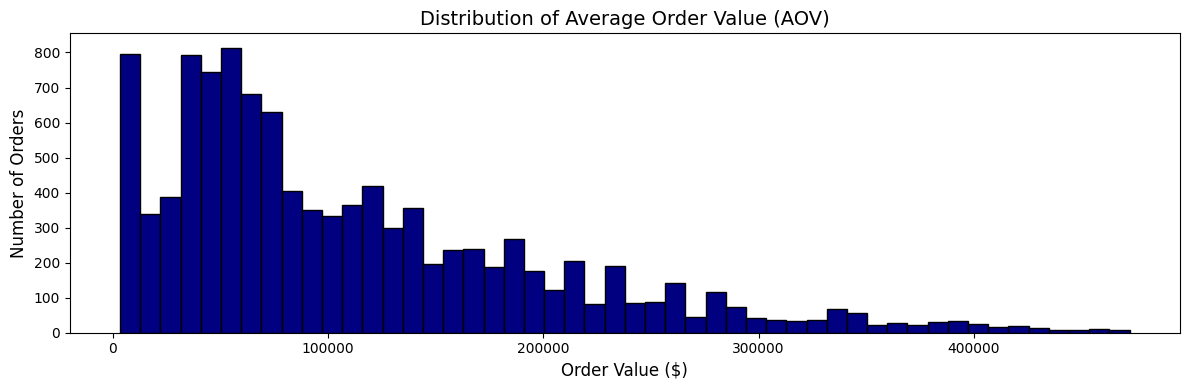

In [199]:

# AOV = revenue per order
aov = df.groupby("order_number")["revenue"].sum()

# Histogram
plt.figure(figsize=(12,4))
plt.hist(aov, bins=50, color="navy", edgecolor="black")

plt.title("Distribution of Average Order Value (AOV)", fontsize=14)
plt.xlabel("Order Value ($)", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.tight_layout()
plt.show()


📊 Insights

Majority of Orders: Most orders fall between $10,000 and $80,000, indicating this is the common spending range for customers.

Skewed Distribution: The distribution is right-skewed, meaning there are fewer high-value orders, but they significantly increase the average.

High-Value Outliers: Orders exceeding $300,000 are rare but could have a big impact on total revenue and may represent key clients or bulk purchases.

Opportunities for Growth: Focusing on increasing the number of mid-to-high value orders could boost overall revenue.

Customer Segmentation: Typical customers tend to have moderate order values, suggesting potential for targeted marketing to encourage larger purchases.

# Profit Margin
Goal:
Understand the distribution of profit margins across orders to identify common profitability levels and any variations in order profitability.

Chart:
Histogram

EDA Type:
Univariate

Structure:
Histogram with 50 bins showing the percentage of orders per profit margin range, with the y-axis formatted as percentages for clarity.

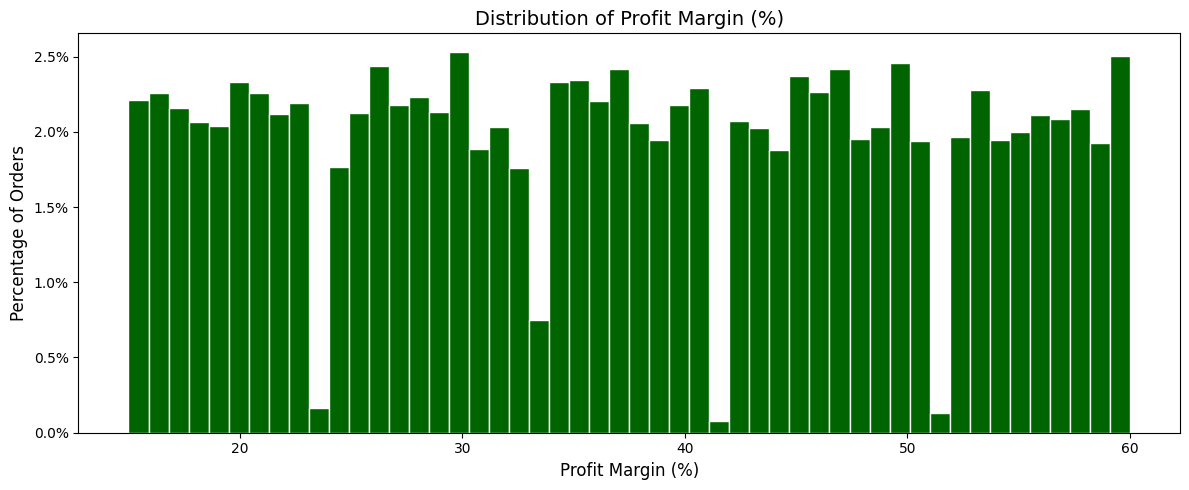

In [202]:


# Profit Margin %
profit_margin = df["Profit_Margin_perecentage"].dropna()  # drop missing values if any

# Histogram with percentages
plt.figure(figsize=(12,5))
plt.hist(profit_margin, bins=50, color="darkgreen", edgecolor="white", 
         weights=np.ones(len(profit_margin)) / len(profit_margin))

# Convert y-axis to percentage format
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.1f}%'))

plt.title("Distribution of Profit Margin (%)", fontsize=14)
plt.xlabel("Profit Margin (%)", fontsize=12)
plt.ylabel("Percentage of Orders", fontsize=12)
plt.tight_layout()
plt.show()


### Insight

Profit Margin Range and Spread
Profit margins across orders range from about 10% up to 60%, showing a broad spread in profitability. This indicates that while some orders are only modestly profitable, others achieve very high margins, suggesting varying cost structures or pricing strategies.

Most Frequent Profit Margin Bands
The bulk of the orders have profit margins between 20% and 55%, with relatively consistent frequency across this range. This suggests that the company's typical profit margin on orders is quite stable and fairly healthy.

Uniform Distribution with Minor Variations
The histogram shows a fairly even distribution across bins, without any sharp spikes or significant dips (except minor drops around 23%, 34%, and 50-52%). This could imply a balanced portfolio of products/orders without major over-reliance on specific margin brackets.

Outliers and Low-Frequency Margins
There are noticeably fewer orders below 15% and above 55% profit margin, which indicates that very low or very high margin orders are relatively rare. These outliers could represent special deals, bulk discounts, or premium pricing that deviate from the norm.

Implications for Strategy
Maintaining focus on orders within the 20%-55% margin band could maximize overall profitability. However, it might also be worth investigating why certain orders fall outside this range — whether low-margin orders can be optimized or if high-margin opportunities can be expanded.

In [ ]:
# Unit price distribution per product
# Top 10 states by Revenue and order Count
# Average Profit Margin by Channel 
# Top and Bottom 10 Customers by Revenue
# Customer Segmentation : Revenue vs Profit Margin
# Corelation HeatMap


# Unit price distribution per product

Goal: Compare pricing variability across different products to identify price consistency and outliers

Chart: Boxplot

EDA Type: Bivariate

Structure: Boxplot with rotated labels to display unit price spread per product

In [206]:
# Unit price distribution per product


# Total revenue by product
Product_Revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Get top 10 products by revenue
df_top_10_products = Product_Revenue.sort_values(by='revenue', ascending=False).head(10)['product_name'].tolist()

# Filter only top 10 products
df_top_10 = df[df['product_name'].isin(df_top_10_products)]


C:\Users\honnu\AppData\Local\Temp\ipykernel_28432\2663802856.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, x="product_name", y="unit_price", palette="Set2")


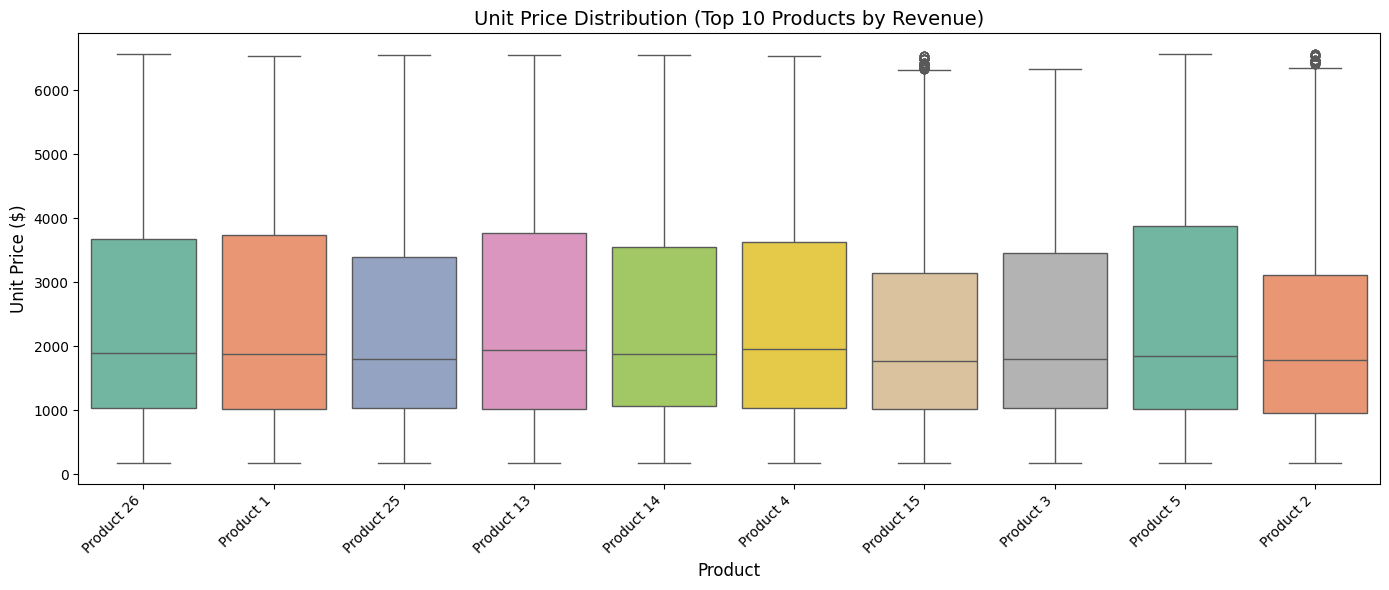

In [213]:


plt.figure(figsize=(14,6))
sns.boxplot(data=df_top_10, x="product_name", y="unit_price", palette="Set2")

plt.title("Unit Price Distribution (Top 10 Products by Revenue)", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Unit Price ($)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Insights

Price Range Consistency
All top 10 products have a fairly similar range of unit prices, generally spanning from around $200 to above $6,000. This suggests these products target a similar pricing spectrum or market segment.

Median Prices
Median unit prices for all products are clustered roughly between $1,800 and $2,000, indicating that the typical selling price is quite consistent across the top revenue-generating products.

Outliers in Pricing
Products 15 and 2 show notable high-end outliers above $6,000. These could be premium or special edition items, reflecting occasional high-value sales that pull the upper price boundary out.

Interquartile Range (IQR) Variation
While most products have a similar IQR (middle 50% of prices), Product 5 shows a slightly wider range, indicating more variability in unit prices—perhaps due to different product variants or discounting strategies.

Lower Whisker Differences
Some products have lower whiskers extending close to $0, like Product 15 and Product 3, suggesting occasional very low-priced sales—potentially due to promotions, discounts, or smaller package sizes.

Pricing Strategy Implications
The consistent median prices suggest a stable pricing approach for these top products, but the presence of outliers and varied price ranges may imply opportunities for tailored pricing or bundling strategies to capture different customer segments.

# Insights

Price Range Consistency
All top 10 products have a fairly similar range of unit prices, generally spanning from around $200 to above $6,000. This suggests these products target a similar pricing spectrum or market segment.

Median Prices
Median unit prices for all products are clustered roughly between $1,800 and $2,000, indicating that the typical selling price is quite consistent across the top revenue-generating products.

Outliers in Pricing
Products 15 and 2 show notable high-end outliers above $6,000. These could be premium or special edition items, reflecting occasional high-value sales that pull the upper price boundary out.

Interquartile Range (IQR) Variation
While most products have a similar IQR (middle 50% of prices), Product 5 shows a slightly wider range, indicating more variability in unit prices—perhaps due to different product variants or discounting strategies.

Lower Whisker Differences
Some products have lower whiskers extending close to $0, like Product 15 and Product 3, suggesting occasional very low-priced sales—potentially due to promotions, discounts, or smaller package sizes.

Pricing Strategy Implications
The consistent median prices suggest a stable pricing approach for these top products, but the presence of outliers and varied price ranges may imply opportunities for tailored pricing or bundling strategies to capture different customer segments.

# Top 10 states by Revenue 

Goal: Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

Chart: Horizontal bar chart

EDA Type: Univariate comparison

Structure:

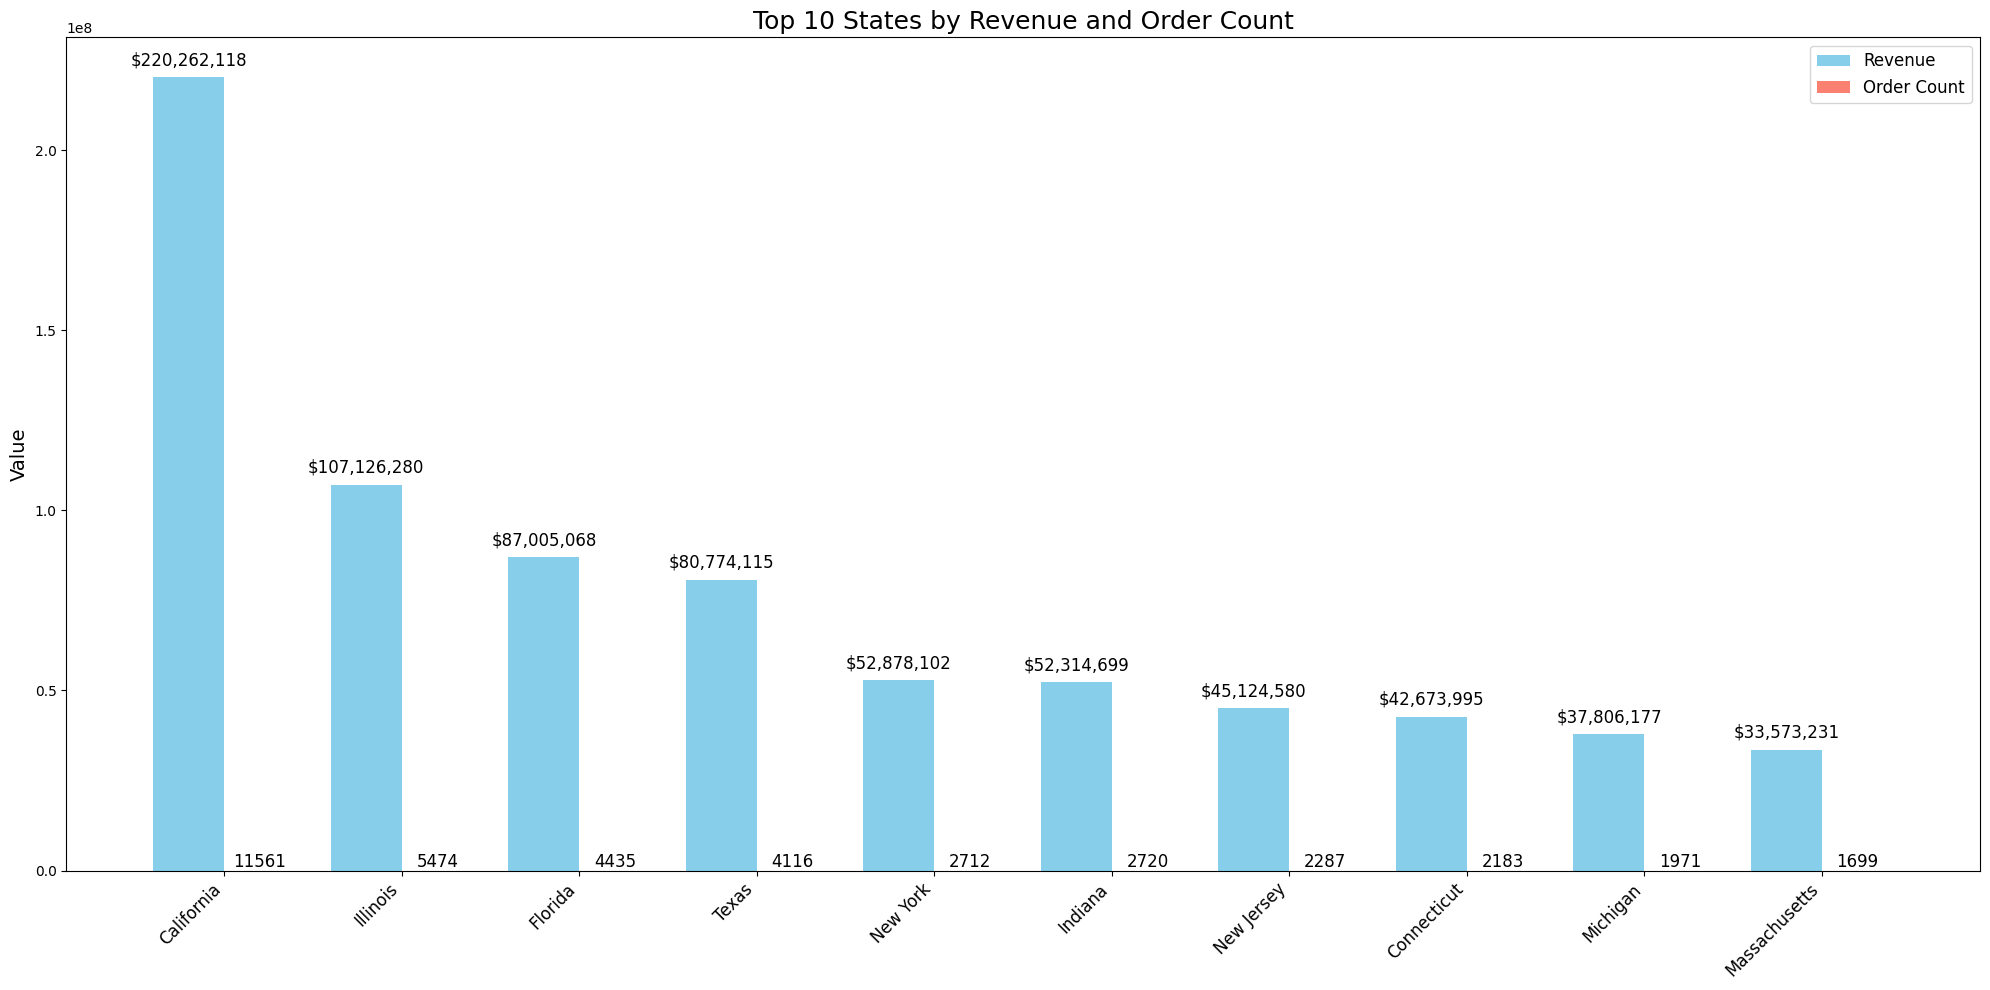

In [224]:
# Top 10 states by Revenue 


# Group by state and calculate total revenue and order count
top_states = df.groupby('state').agg(
    total_revenue=('revenue', 'sum'),
    order_count=('order_number', 'count')
).reset_index()

# Get top 10 states by revenue
top_10_states = top_states.sort_values(by='total_revenue', ascending=False).head(10)

# Plot grouped bar chart
plt.figure(figsize=(20,10))
bar_width = 0.4
x = range(len(top_10_states))

# Revenue bars
plt.bar(x, top_10_states['total_revenue'], width=bar_width, label='Revenue', color='skyblue')

# Order count bars (shifted)
plt.bar([i + bar_width for i in x], top_10_states['order_count'], width=bar_width, label='Order Count', color='salmon')

# Labels
plt.xticks([i + bar_width/2 for i in x], top_10_states['state'], rotation=45, ha='right', fontsize=12)
plt.ylabel('Value', fontsize=14)
plt.title('Top 10 States by Revenue and Order Count', fontsize=18)
plt.legend(fontsize=12)

# Add values on top of bars
for i, row in enumerate(top_10_states.itertuples()):
    plt.text(i, row.total_revenue + max(top_10_states['total_revenue'])*0.01, f"${row.total_revenue:,.0f}", ha='center', va='bottom', fontsize=12)
    plt.text(i + bar_width, row.order_count + max(top_10_states['order_count'])*0.01, f"{row.order_count}", ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


### Detailed Insight:

Detailed Insight Summary:

California Leads: With over $220 million in revenue and 11,561 orders, California is the top-performing market, driving both high sales volume and revenue.

Strong Contenders: Illinois, Florida, and Texas generate substantial revenue ($80M-$107M) but have fewer orders, indicating higher average purchase values or different buying behaviors.

Balanced Markets: New York and Indiana show moderate revenue (~$52M) with consistent order counts (~2,700), suggesting stable and healthy markets with growth potential.

Smaller Markets: New Jersey, Connecticut, Michigan, and Massachusetts have lower revenue ($33M-$45M) and order counts (1,699-2,287), representing opportunities for targeted growth through focused marketing.

Growth Opportunities: The wide revenue gap between California and other states calls for analyzing California’s success factors to replicate in other markets. States with moderate orders but lower revenue may benefit from strategies to increase average order size or upsell.

# Average Profit Margin by Channel  

Goal: Compare average profit margins across sales channels to identify the most and least profitable routes

Chart: Bar chart

EDA Type: Bivariate

Structure: Vertical bars with data labels showing margin percentages, sorted descending by channel

C:\Users\honnu\AppData\Local\Temp\ipykernel_28432\1281315084.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


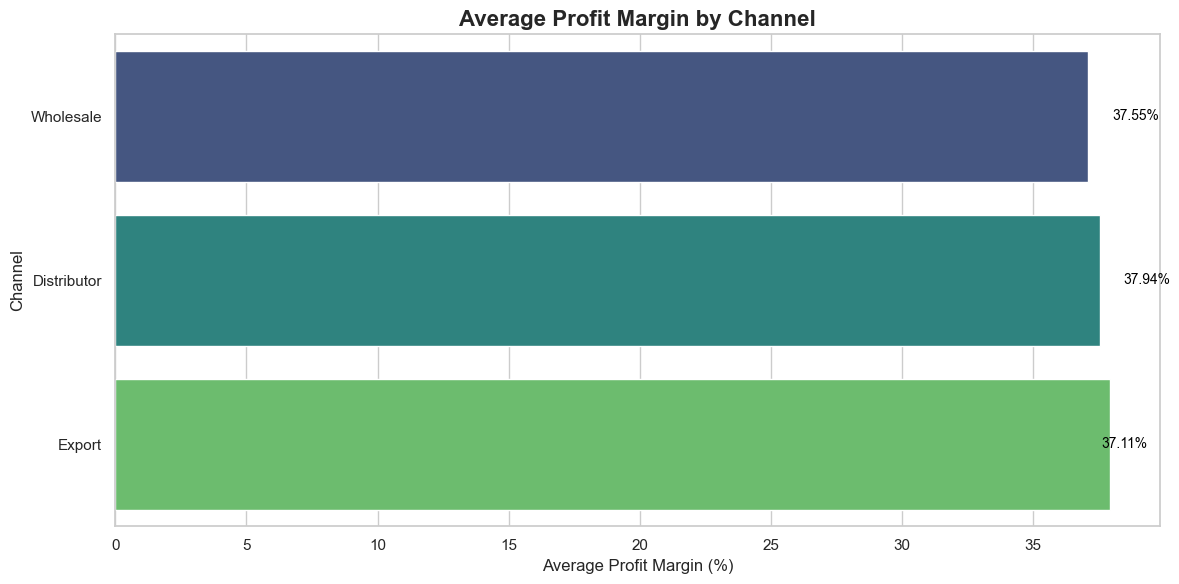

In [226]:
# Average Profit Margin by Channel  


# Set a nice theme
sns.set_theme(style="whitegrid")

# Calculate average profit margin
avg_profit_margin = df.groupby('channel')['Profit_Margin_perecentage'].mean().reset_index()
avg_profit_margin = avg_profit_margin.sort_values(by='Profit_Margin_perecentage', ascending=True)

# Plot horizontal bar
plt.figure(figsize=(12,6))
sns.barplot(
    data=avg_profit_margin, 
    x='Profit_Margin_perecentage', 
    y='channel', 
    palette='viridis'
)

# Labels
for index, row in avg_profit_margin.iterrows():
    plt.text(row['Profit_Margin_perecentage'] + 0.5, index, f"{row['Profit_Margin_perecentage']:.2f}%", 
             va='center', fontsize=10, color='black')

plt.title("Average Profit Margin by Channel", fontsize=16, fontweight='bold')
plt.xlabel("Average Profit Margin (%)", fontsize=12)
plt.ylabel("Channel", fontsize=12)
plt.tight_layout()
plt.show()


Detailed Insights:

1. Distributor Channel Leads in Profit Margin
The Distributor channel has the highest average profit margin at approximately 37.94%. This suggests that sales through distributors are the most profitable, potentially due to better pricing, lower costs, or higher efficiency in that channel.

2. Wholesale Channel Close Behind
Wholesale follows closely with an average profit margin of around 37.55%. The small gap between Wholesale and Distributor indicates both channels are similarly efficient and profitable, likely benefiting from bulk sales or consistent demand.

3. Export Channel Slightly Lower
The Export channel has the lowest average profit margin at about 37.11%. Although still strong, this may reflect additional costs such as shipping, tariffs, or currency fluctuations that slightly reduce profitability compared to domestic channels.

4. Margins are Consistent Across Channels
All three channels have profit margins clustered closely around 37%, indicating a generally healthy and balanced profitability structure across the business’s sales channels.

# Top 10 States  Revenue vs Order Count

Goal: Identify your highest- and lowest-revenue customers to tailor engagement strategies

Chart: Side-by-side horizontal bar charts

EDA Type: Multivariate

Structure: Left chart shows top 10 customers by revenue (in millions), right chart shows bottom 10 customers by revenue (in millions)

C:\Users\honnu\AppData\Local\Temp\ipykernel_28432\2999538224.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='total_revenue', data=top_10_state, palette='Blues', ax=ax1)


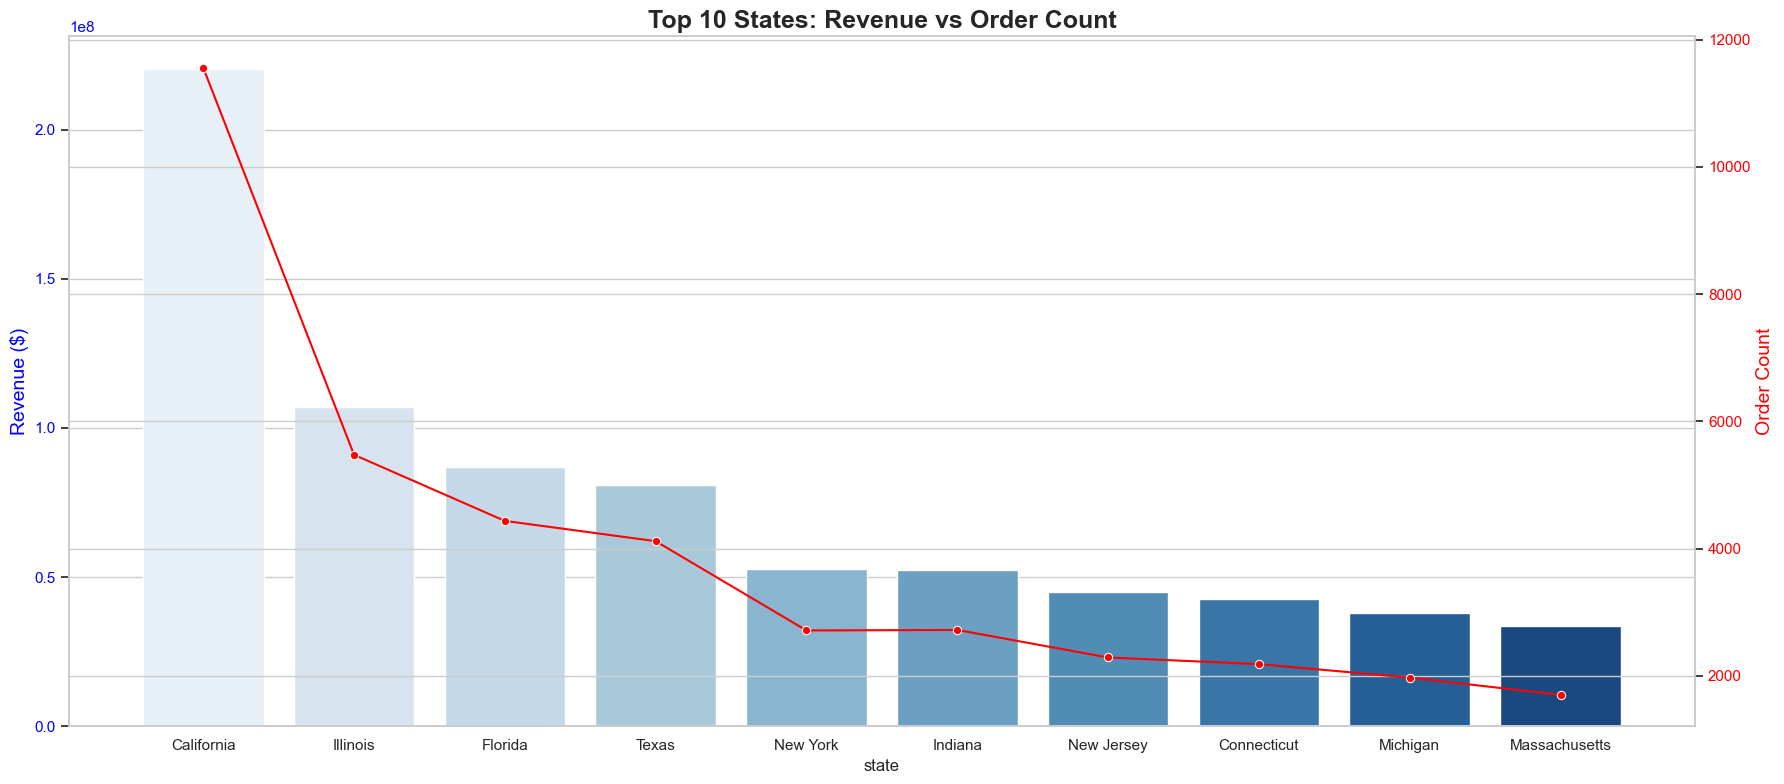

In [228]:
state_data = df.groupby('state').agg(total_revenue=('revenue','sum'), order_count=('order_number','count')).reset_index()
top_10_state = state_data.sort_values('total_revenue', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(18,8))

# Bar for revenue
sns.barplot(x='state', y='total_revenue', data=top_10_state, palette='Blues', ax=ax1)
ax1.set_ylabel('Revenue ($)', fontsize=14, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line for order count
ax2 = ax1.twinx()
sns.lineplot(x='state', y='order_count', data=top_10_state, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Order Count', fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Top 10 States: Revenue vs Order Count", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


## Detailed Insights:

1. California Leads Strongly in Revenue and Order Count
California outperforms all other states with a revenue exceeding $220 million and an order count above 11,500. This highlights California as a massive market with high demand and significant sales volume, making it critical for business growth and investment.

2. Illinois, Florida, and Texas Follow in Revenue but Lower in Orders

Illinois, Florida, and Texas show substantial revenue figures between approximately $80 million to $110 million.

Their order counts, however, are much lower than California, ranging from 4,100 to 5,400 orders.
This suggests that these states have higher average order values or larger purchases per order compared to California. It indicates a different consumer behavior or pricing strategy in these markets.

3. Balanced Revenue and Orders in New York and Indiana

New York and Indiana each generate revenue near $50 million with order counts around 2,700.

This reflects consistent sales patterns and stable markets. These states contribute solidly to overall revenue but with smaller sales volumes compared to the leaders.

4. Smaller Markets with Lower Revenue and Orders

New Jersey, Connecticut, Michigan, and Massachusetts have revenues between $30 million and $45 million and order counts below 2,300.

These represent emerging or less penetrated markets with potential for growth through targeted marketing or sales strategies.

# Top and Bottom 10 Customers by Revenue
Goal: Identify your highest- and lowest-revenue customers to tailor engagement strategies

Chart: Side-by-side horizontal bar charts

EDA Type: Multivariate

Structure: Left chart shows top 10 customers by revenue (in millions), right chart shows bottom 10 customers by revenue (in millions)

C:\Users\honnu\AppData\Local\Temp\ipykernel_28432\368410114.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='Greens_r', ax=axes[0])
C:\Users\honnu\AppData\Local\Temp\ipykernel_28432\368410114.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10.index, y=bottom_10.values, palette='Reds_r', ax=axes[1])


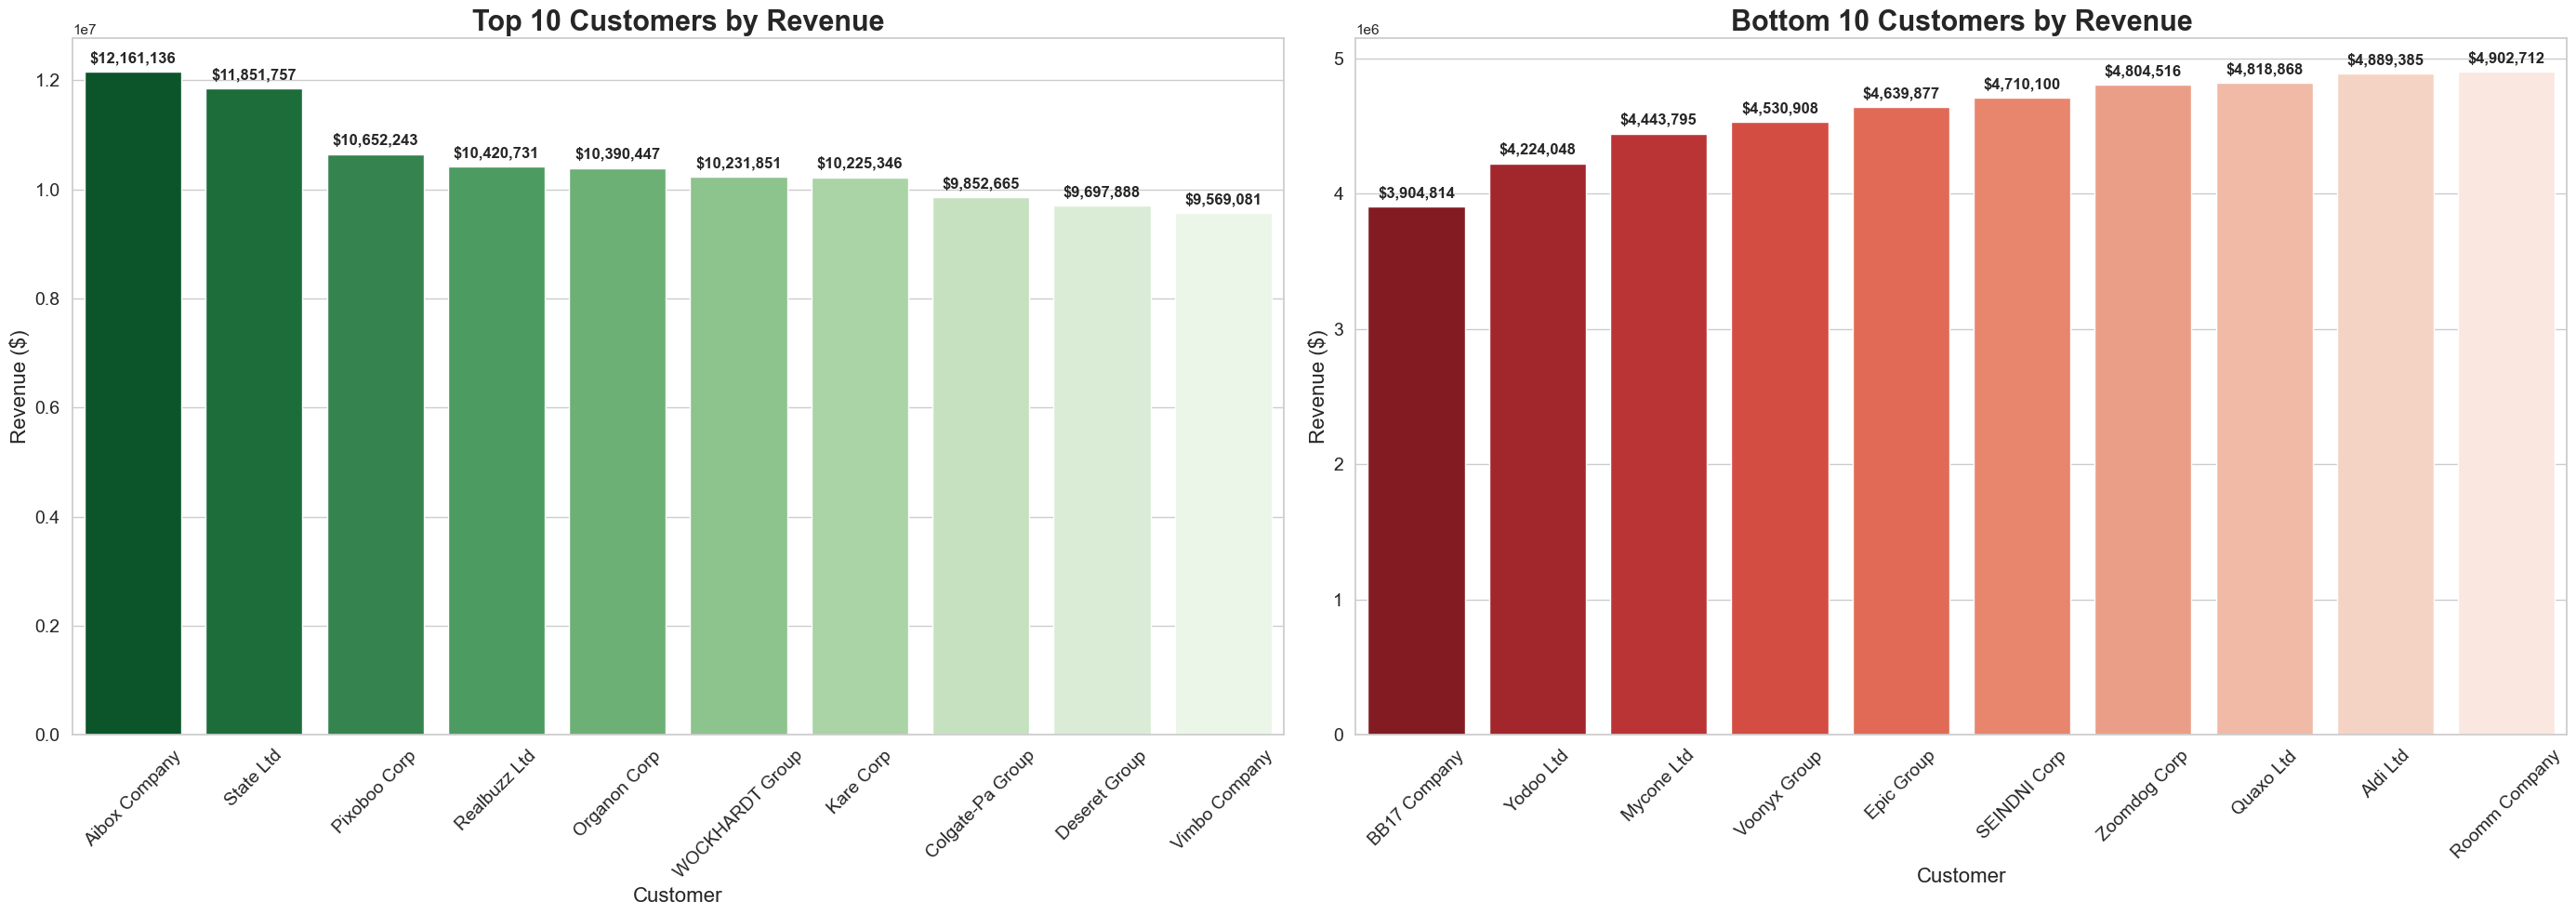

In [236]:


# Aggregate revenue per customer
customer_revenue = df.groupby('customer_names')['revenue'].sum()

# Top 10 and Bottom 10 customers
top_10 = customer_revenue.nlargest(10)
bottom_10 = customer_revenue.nsmallest(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(28,10))  # side by side

# --- Top 10 Customers ---
sns.barplot(x=top_10.index, y=top_10.values, palette='Greens_r', ax=axes[0])
axes[0].set_title("Top 10 Customers by Revenue", fontsize=22, fontweight='bold')
axes[0].set_xlabel("Customer", fontsize=16)
axes[0].set_ylabel("Revenue ($)", fontsize=16)
axes[0].tick_params(axis='x', rotation=45, labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

# Add labels on top of bars
for i, val in enumerate(top_10.values):
    axes[0].text(i, val + max(top_10.values)*0.01, f"${val:,.0f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

# --- Bottom 10 Customers ---
sns.barplot(x=bottom_10.index, y=bottom_10.values, palette='Reds_r', ax=axes[1])
axes[1].set_title("Bottom 10 Customers by Revenue", fontsize=22, fontweight='bold')
axes[1].set_xlabel("Customer", fontsize=16)
axes[1].set_ylabel("Revenue ($)", fontsize=16)
axes[1].tick_params(axis='x', rotation=45, labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)

# Add labels on top of bars
for i, val in enumerate(bottom_10.values):
    axes[1].text(i, val + max(bottom_10.values)*0.01, f"${val:,.0f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


## Customer Revenue Insights:
### Top 10 Customers by Revenue:

Abox Company leads with revenue exceeding $12 million, followed closely by State Ltd with approximately $11.85 million.

Other top customers like Pixaboo Corp, Realbuzz Ltd, and Organon Corp generate revenues ranging from $9.5 million to $10.6 million.

This segment represents the high-value customers who contribute significantly to overall revenue.

These customers are likely critical to the business, and maintaining strong relationships with them is essential for sustained revenue.

### Bottom 10 Customers by Revenue:

The bottom 10 customers have revenues clustered between approximately $3.9 million and $4.9 million.

Companies like B81T Company, Yodog Ltd, and Mycone Ltd form the lower end, with revenues just below $4.5 million.

This segment may include smaller accounts or newer customers.

There may be an opportunity to grow revenue here through targeted upselling or cross-selling strategies.

# Customer Segmentation : Revenue vs Profit Margin
Goal: Segment customers by total revenue and average profit margin, highlighting order volume

Chart: Bubble chart (scatter plot with variable point sizes)

EDA Type: Multivariate

Structure: Scatter points sized by number of orders, plotting revenue vs. margin

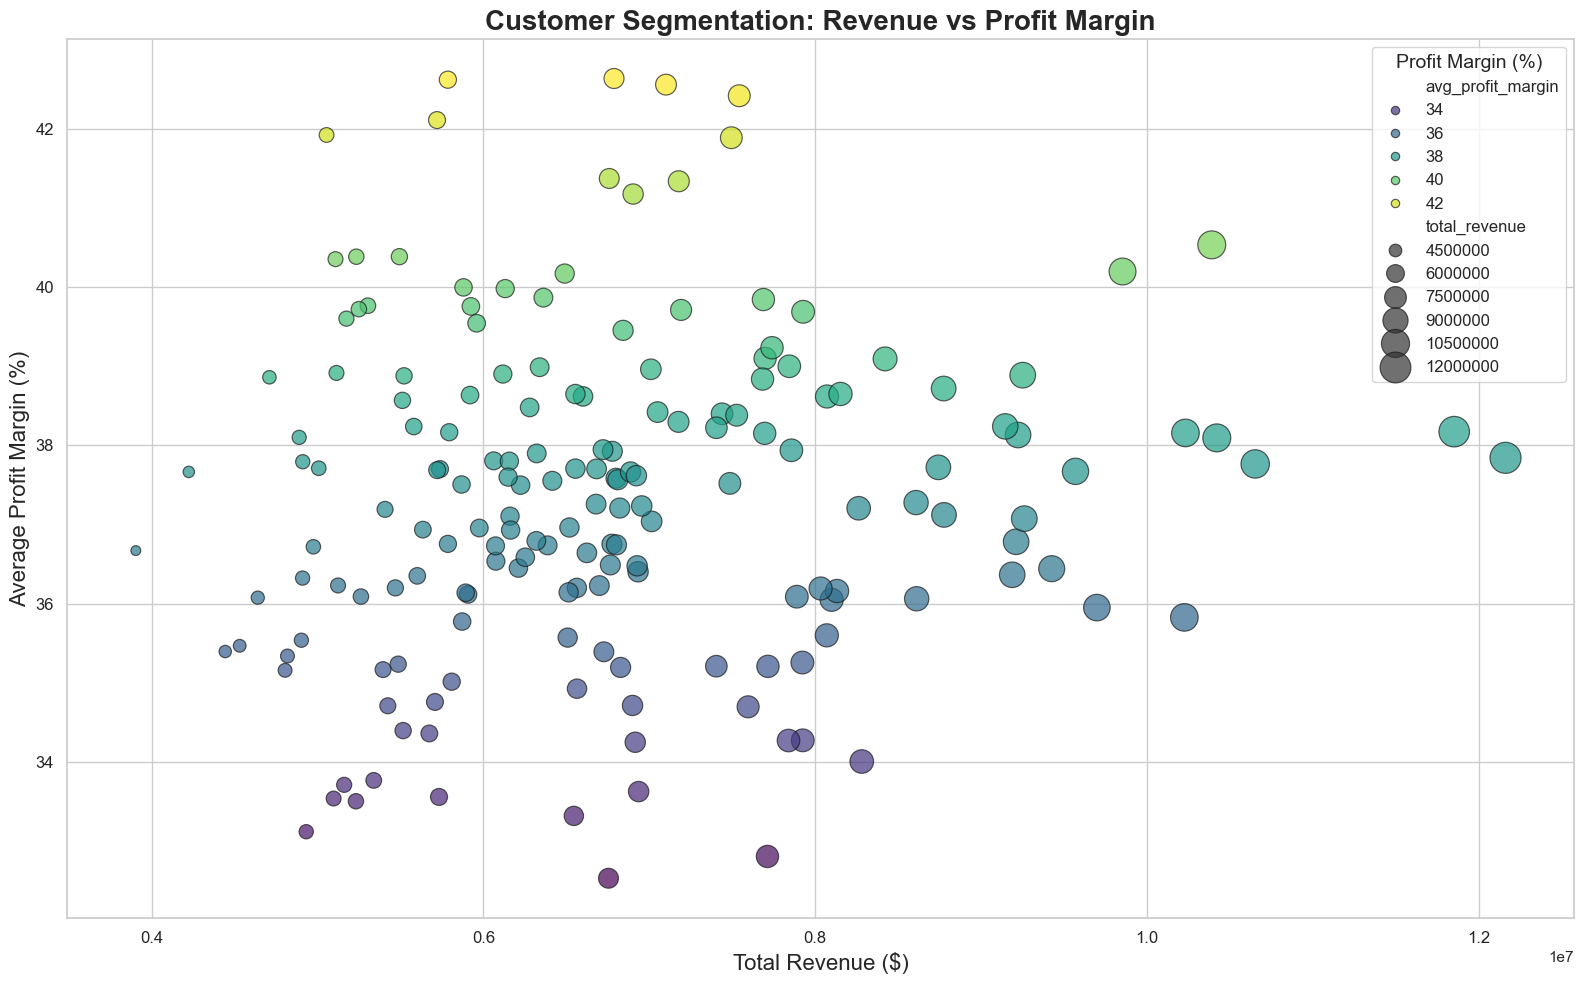

In [231]:


# Aggregate revenue and profit margin per customer
customer_segmentation = df.groupby('customer_names').agg(
    total_revenue=('revenue', 'sum'),
    avg_profit_margin=('Profit_Margin_perecentage', 'mean')
).reset_index()

# Scatter plot
plt.figure(figsize=(16,10))
sns.scatterplot(
    data=customer_segmentation,
    x='total_revenue',
    y='avg_profit_margin',
    size='total_revenue',   # optional: make bigger revenue points larger
    sizes=(50, 500),        # min & max point size
    hue='avg_profit_margin', # color by profit margin
    palette='viridis',
    alpha=0.7,
    edgecolor='k'
)

plt.title("Customer Segmentation: Revenue vs Profit Margin", fontsize=20, fontweight='bold')
plt.xlabel("Total Revenue ($)", fontsize=16)
plt.ylabel("Average Profit Margin (%)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Profit Margin (%)', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


## Insight

Revenue Spread:

Customers have a wide range of total revenue, from around $4 million up to $12 million.

Larger circles are mostly clustered toward the right, indicating higher revenues.

Profit Margin Distribution:

Profit margins mostly range from about 33% to 43%.

There is no strong linear correlation between revenue and profit margin—some customers with high revenue have both low and high profit margins.

High Revenue & High Margin:

Some customers achieve both high revenue and high profit margin (yellow larger circles in the upper right).

These customers represent highly valuable accounts for the company.

Low Revenue but High Margin:

There are points with smaller sizes but higher profit margins (yellow smaller circles).

These customers might be niche or specialized accounts with efficient profitability.

Moderate Revenue & Margin Cluster:

Most points lie in the middle, indicating average revenue and profit margin.

This might represent the typical customer profile.

# Correlation Heatmap of Numeric Features
Goal: Identify relationships among key numeric variables to uncover potential multicollinearity

Chart: Correlation heatmap

EDA Type: Multivariate

Structure: Annotated heatmap with correlation coefficients for selected numeric columns

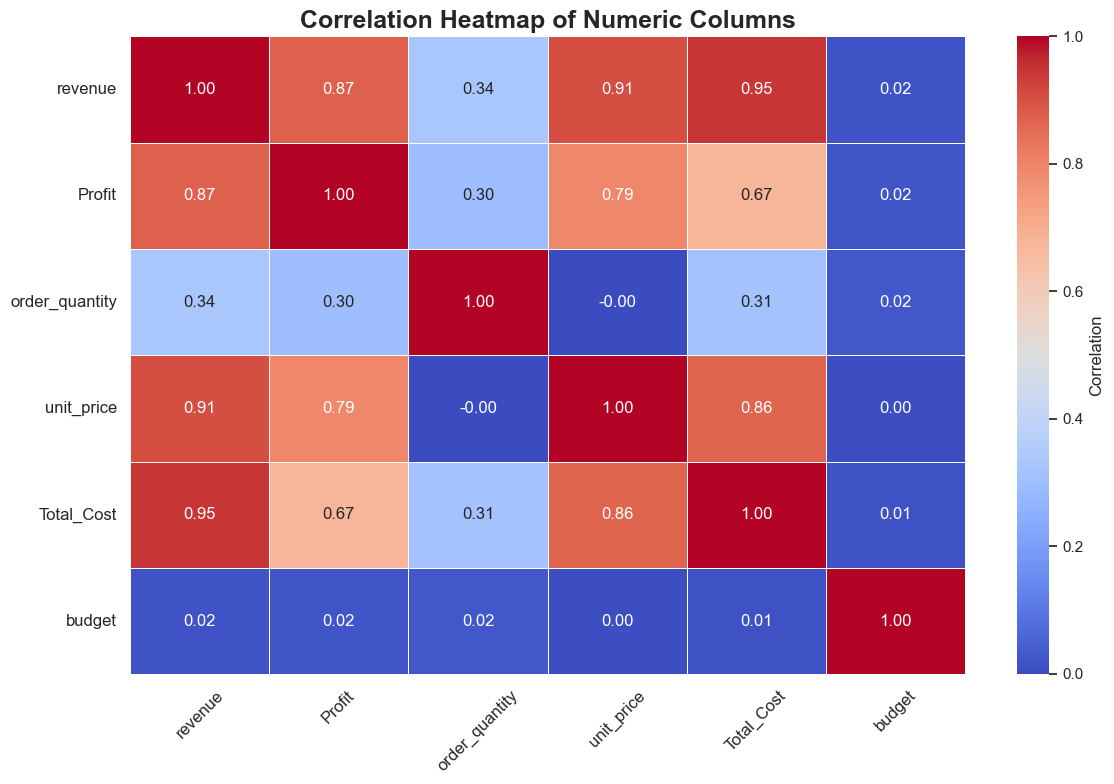

In [239]:


# Select numeric columns for correlation
numeric_cols = ['revenue', 'Profit', 'Profit_Margin_perecentage', 'order_quantity', 'unit_price', 'cost', 'Total_Cost', 'budget']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix, 
    annot=True,            # show correlation values
    fmt=".2f", 
    cmap='coolwarm',       # color gradient
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)

plt.title("Correlation Heatmap of Numeric Columns", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()


## Insight

Revenue and Profit: High positive correlation (0.87), indicating that as revenue increases, profit tends to increase as well.

Revenue and Total Cost: Very strong correlation (0.95), which is expected since costs usually scale with revenue.

Unit Price is highly correlated with revenue, profit, and total cost, suggesting price changes impact these significantly.

Order Quantity has weak correlations with revenue and profit and no correlation with unit price, indicating sales volume might have less impact or is influenced by other factors.

Budget shows no correlation with other variables, meaning it might be independent or not directly related to sales figures here.

# Saving Pre-Processed Dataframe

In [243]:
df.columns.values

array(['order_number', 'order_date', 'customer_names', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue', 'cost',
       'state_code', 'county', 'state', 'region', 'lat', 'lon', 'budget',
       'Total_Cost', 'Profit', 'Profit_Margin_perecentage', 'order_month',
       'Order_Month_Num', 'Order_Month_Name'], dtype=object)

In [ ]:
df.to_csv('File.csv')